## Adaboost Algorithm


AdaBoost, also called Adaptive Boosting, is a technique in Machine Learning used as an Ensemble Method.
The most common estimator used with AdaBoost is decision trees with one level which means Decision trees with only 1 split. These trees are also called Decision Stumps.
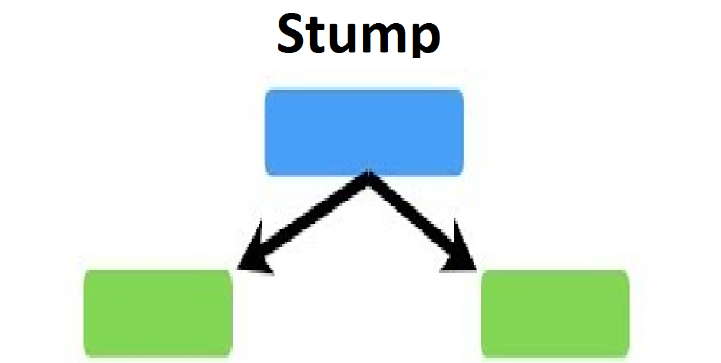

What this algorithm does is that it builds a model and gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now all the points with higher weights are given more importance in the next model. It will keep training models until and unless a lower error is received.
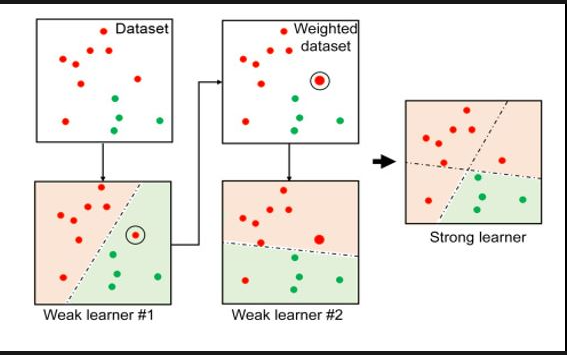

### Working of Adaboost :
1. Each training example is assigned an equal weight initially.
2. A weak classifier is trained on the training data, considering the sample weights. The weak classifier is typically a simple learning algorithm like decision trees with single depth.
3. The weak classifier's performance is evaluated by calculating the weighted error rate. The weights of the incorrectly classified examples are increased, while the weights of the correctly classified examples are decreased.
4. The sample weights are updated based on their classification errors.
5. 2-4 are repeated for a specified number of iterations or until a stopping criterion is met. In each iteration, a new weak classifier is trained on the updated weights.
6. The weak classifiers are combined by assigning weights to them based on their performance. The better a weak classifier performs, the higher its weight in the final classifier.
7. The combined weak classifiers form the strong classifier, and its output is determined by the weighted majority voting or weighted averaging of the weak classifiers' predictions.

## Implementation of Adaboost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=pd.read_csv('E:\Courses\Data science(ETLHive)\dataset\diabetes (2).csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

There are some 0 values which are incorrect, we need to replace them

In [10]:
# replacing zero values with the mean of the columnn

df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

 Data is cleaned

## Spliting data

In [11]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

## Feature scaling

In [13]:
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Model building

In [14]:
dtc=DecisionTreeClassifier() 

ada=AdaBoostClassifier(base_estimator=dtc) #taking default parameters with decision tree as base estimator

In [15]:
ada.fit(x_train,y_train)

y_pred=ada.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.56      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231



## Hyperparameter tuning:

##### parameters
* Base Estimator: AdaBoost requires a weak learner as its base estimator. Decision trees are commonly used, but you can choose other algorithms as well. The choice of the weak learner depends on the problem at hand.

* Number of Estimators: The number of estimators (or weak learners) to be combined in the ensemble is a crucial parameter. It is usually denoted as n_estimators in most implementations. A larger number of estimators can improve the performance but may increase training time.

* Learning Rate: The learning rate parameter (commonly denoted as learning_rate) controls the contribution of each weak learner to the final prediction. A smaller learning rate reduces the impact of each weak learner, making the learning process more conservative.

In [16]:
parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [17]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 90}

In [18]:
ada=AdaBoostClassifier(base_estimator=dtc,learning_rate= 0.1, n_estimators= 200) 

ada.fit(x_train,y_train)

y_pred=ada.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       151
           1       0.58      0.74      0.65        80

    accuracy                           0.72       231
   macro avg       0.71      0.73      0.71       231
weighted avg       0.75      0.72      0.73       231



## Conclusion:
* After tuning, there is not significant change in the accuracy, so this dataset doesnot require any hyperparameter tuning.